<a href="https://colab.research.google.com/github/luizchenriq/alura_imersao_dados_4/blob/main/Alura_Imersao_dados_4_aula1_desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 1**

**Desafios**


---

In [5]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


1 - Realizar a média de metragem para cada um dos bairros. (Proposto pelo Paulo)

In [7]:
dados.groupby("Bairro").mean()["Metragem"]

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

2 - Duas forma de selecionar os dados por bairro (consultar os métodos na documentação do Pandas). (Proposto pelo Thiago)


Por índice da coluna:

In [8]:
dados.iloc[:, [3]].mean()

Metragem    442.300659
dtype: float64

Por nome da coluna:

In [12]:
dados["Metragem"].mean()

442.30065947242207

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão. (Proposto pelo Thiago)

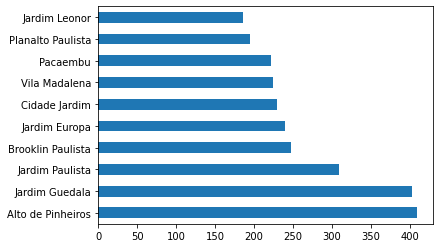

In [17]:
dados["Bairro"].value_counts().head(10).plot.barh()

4 - Pegar outras estatísticas dos dados (Como média, mediana, min, max). (Proposta pela Vivian)

In [36]:
dados_bairros_quartos = dados[['Bairro', 'Quartos']]
dados_bairros_quartos.head(5)

,Bairro,Quartos
0,Planalto Paulista,4
1,Jardim dos Estados,4
2,Jardim Reimberg,4
3,Jardim Morumbi,3
4,Mooca,3


O maior número de quartos de cada bairro:

In [51]:
dados_bairros_quartos.groupby("Bairro").max("Quartos").astype(int).sort_values("Quartos",ascending=False)

,Quartos
Bairro,
Vila Gomes,16
Vila Clementino,15
Jardim Paulista,13
Parque da Mooca,12
Parque São Lucas,12
...,...
Jardim Santa Fé (Zona Sul),1
Jardim São José,1
Jardim Raposo Tavares,1


O menor número de quartos de cada bairro:

In [52]:
dados_bairros_quartos.groupby("Bairro").min("Quartos").astype(int).sort_values("Quartos")

,Quartos
Bairro,
Vila Barbosa,1
Chácara Califórnia,1
Sumaré,1
Chácara Inglesa,1
Saúde,1
...,...
Parque Novo Mundo,6
Jardim Castelo,6
Vila Sabrina,8


A mediana do número de quartos de cada bairro:

In [39]:
dados_bairros_quartos.groupby("Bairro").median("Quartos").astype(int)

,Quartos
Bairro,
Aclimação,3
Alto da Boa Vista,4
Alto da Lapa,3
Alto da Mooca,3
Alto de Pinheiros,4
...,...
Vila Água Funda,2
Água Branca,3
Água Fria,3


A média de quartos de cada bairro:

In [41]:
dados_bairros_quartos.groupby("Bairro").mean("Quartos").astype(int)

,Quartos
Bairro,
Aclimação,3
Alto da Boa Vista,4
Alto da Lapa,3
Alto da Mooca,3
Alto de Pinheiros,3
...,...
Vila Água Funda,2
Água Branca,3
Água Fria,2


5 - Descobir quais são os bairros que não tem nome de rua. (Proposto pela Vivian)

In [70]:
dados[dados['Rua'].isnull()]['Bairro'].value_counts()

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64